CSV file created successfully.

Final coefficients: [-4.04555597  0.9765604 ]

Accuracy: 100.00%
Probability of passing for 3.5 hours of study: 0.3481
Fail
Probability of passing for 7.5 hours of study: 0.9637
Pass


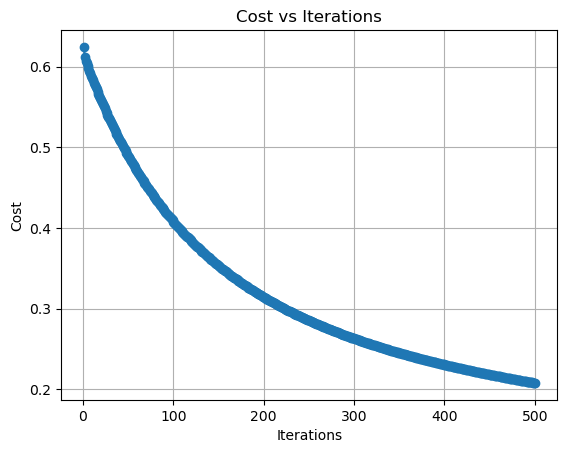

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'hours': [1, 2, 3, 4, 5, 6, 7, 8],
    'pass': [0, 0, 0, 0, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
csv_file = 'ppass.csv'
df.to_csv(csv_file, index=False)
print('CSV file created successfully.')

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    
    for i in range(iterations):
        predictions = sigmoid(X @ theta)
        errors = predictions - y
        gradient = (1/m) * (X.T @ errors)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    
    return theta, costs

df = pd.read_csv(csv_file)
X = df['hours'].values
y = df['pass'].values


X = np.vstack([np.ones(len(X)), X]).T
theta = np.zeros(X.shape[1])
alpha = 0.1
iterations = 500  

theta, costs = gradient_descent(X, y, theta, alpha, iterations)

print(f'\nFinal coefficients: {theta}')


def predict_prob(x, theta):
    return sigmoid(np.dot(x, theta))

def predict(x, theta):
    return np.round(predict_prob(x, theta))

predictions = predict(X, theta)
accuracy = np.mean(predictions == y)
print(f'\nAccuracy: {accuracy * 100:.2f}%')


X_new = np.array([1, 3.5])
prob_3_5 = predict_prob(X_new, theta)
X_new = np.array([1, 7.5])
prob_7_5 = predict_prob(X_new, theta)

print(f'Probability of passing for 3.5 hours of study: {prob_3_5:.4f}')
if(prob_3_5 >= 0.5):
    print("Pass")
else:
    print('Fail')
print(f'Probability of passing for 7.5 hours of study: {prob_7_5:.4f}')
if(prob_7_5 >= 0.5):
    print("Pass")
else:
    print('Fail')

plt.plot(range(1, iterations + 1), costs, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.grid(True)
plt.show()
